## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [38]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession



In [39]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [40]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"dataset\train"
valid_path = r"dataset\val"


In [41]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [42]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [43]:
  # useful for getting number of output classes
folders = glob('dataset/val/*')

In [44]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [46]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [47]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [48]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1579 images belonging to 4 classes.


In [50]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 204 images belonging to 4 classes.


In [51]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
50/50 [==============================] - 154s 3s/step - loss: 3.3765 - accuracy: 0.7106 - val_loss: 0.6764 - val_accuracy: 0.9020
Epoch 2/20
50/50 [==============================] - 164s 3s/step - loss: 0.3530 - accuracy: 0.9335 - val_loss: 0.2363 - val_accuracy: 0.9412
Epoch 3/20
50/50 [==============================] - 159s 3s/step - loss: 0.2431 - accuracy: 0.9519 - val_loss: 0.4384 - val_accuracy: 0.9265
Epoch 4/20
50/50 [==============================] - 149s 3s/step - loss: 0.2082 - accuracy: 0.9563 - val_loss: 0.9551 - val_accuracy: 0.8480
Epoch 5/20
50/50 [==============================] - 149s 3s/step - loss: 0.1665 - accuracy: 0.9595 - val_loss: 0.5535 - val_accuracy: 0.9314
Epoch 6/20
50/50 [==============================] - 152s 3s/step - loss: 0.1804 - accuracy: 0.9664 - val_loss: 0.3259 - val_accuracy: 0.9461
Epoch 7/20
50/50 [==============================] - 152s 3s/step - loss: 0.0628 - accuracy: 0.9829 - val_loss: 0.3590 - val_accuracy: 0.9461
Epoch 8/20
50

In [52]:
import matplotlib.pyplot as plt

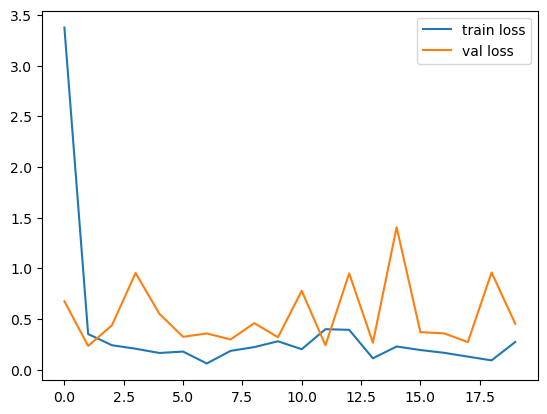

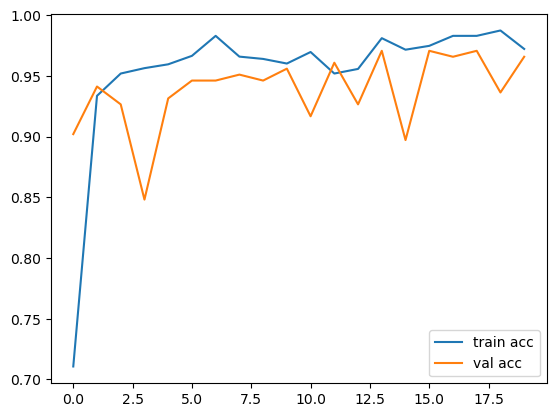

<Figure size 640x480 with 0 Axes>

In [53]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [55]:

y_pred = model.predict(test_set)


In [56]:
y_pred

array([[1.45466467e-29, 2.12561484e-33, 1.00000000e+00, 1.08721782e-15],
       [1.23098072e-19, 1.41770477e-26, 8.88201628e-15, 1.00000000e+00],
       [1.65878263e-31, 2.91443953e-26, 1.00000000e+00, 1.75838836e-19],
       [3.04045335e-16, 1.00000000e+00, 3.43832283e-18, 5.95521854e-29],
       [2.69998978e-30, 1.00000000e+00, 1.53617898e-23, 7.40364665e-29],
       [6.21946936e-26, 6.39833349e-29, 1.00000000e+00, 8.00471157e-19],
       [1.63450560e-23, 2.75359314e-27, 1.00000000e+00, 6.19829396e-11],
       [1.00000000e+00, 2.64069669e-11, 3.01032250e-22, 7.87491190e-16],
       [8.19475270e-19, 2.46423687e-14, 9.99938488e-01, 6.14857345e-05],
       [3.19349361e-19, 1.15305818e-23, 1.00000000e+00, 1.03329709e-19],
       [9.99974608e-01, 2.53940398e-05, 1.09987451e-32, 2.21851360e-09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.11062698e-27],
       [1.70382262e-19, 3.37000591e-21, 9.99997497e-01, 2.49211553e-06],
       [8.90766194e-24, 1.23686351e-28, 1.00000000e

In [57]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [58]:
y_pred

array([2, 3, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 3, 3, 2, 2, 3, 1, 2, 0,
       3, 0, 2, 2, 1, 3, 2, 1, 0, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 1, 2, 1,
       2, 3, 3, 2, 0, 2, 2, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 3, 2, 1,
       2, 3, 2, 2, 3, 3, 3, 0, 2, 3, 1, 0, 1, 1, 3, 2, 0, 2, 1, 2, 0, 1,
       3, 2, 2, 3, 2, 2, 2, 0, 2, 3, 1, 2, 3, 0, 2, 1, 3, 1, 0, 3, 2, 2,
       2, 0, 3, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 1, 3, 2, 3, 3, 3, 0, 3,
       0, 3, 3, 1, 2, 0, 1, 3, 2, 1, 3, 3, 2, 1, 1, 0, 2, 2, 3, 2, 3, 3,
       1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3,
       2, 3, 2, 1, 0, 2, 2, 3, 2, 2, 1, 2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 1,
       0, 3, 3, 2, 1, 2], dtype=int64)

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [61]:
model=load_model('model_inception.h5')

In [64]:
img=image.load_img('dataset/train/Curl Virus/curl00.jpg',target_size=(224,224))

In [65]:
x=image.img_to_array(img)
x

array([[[238., 242., 243.],
        [250., 254., 255.],
        [248., 252., 255.],
        ...,
        [245., 246., 251.],
        [249., 248., 253.],
        [252., 251., 255.]],

       [[250., 254., 253.],
        [239., 243., 242.],
        [239., 241., 240.],
        ...,
        [254., 255., 255.],
        [249., 249., 249.],
        [252., 252., 252.]],

       [[235., 239., 240.],
        [250., 251., 253.],
        [254., 255., 255.],
        ...,
        [235., 235., 233.],
        [247., 247., 245.],
        [251., 251., 249.]],

       ...,

       [[247., 241., 245.],
        [231., 230., 235.],
        [241., 246., 249.],
        ...,
        [255., 255., 248.],
        [251., 252., 244.],
        [252., 255., 248.]],

       [[254., 249., 253.],
        [254., 255., 255.],
        [244., 252., 254.],
        ...,
        [250., 253., 244.],
        [236., 242., 232.],
        [243., 251., 240.]],

       [[233., 232., 237.],
        [240., 244., 247.],
        [240., 2

In [66]:
x.shape

(224, 224, 3)

In [67]:
x=x/255

In [68]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [69]:
model.predict(img_data)

array([[3.1371828e-06, 9.9998808e-01, 2.0071696e-11, 8.8429379e-06]],
      dtype=float32)

In [70]:
a=np.argmax(model.predict(img_data), axis=1)

In [71]:
a==1

array([ True])